In [75]:
import numpy as np
import json
import pandas as pd

In [76]:
# read the output logs file
with open('/home/aiops/zhuty/tinyllama/scripts/fewshot_eval/outputs/logs', 'r') as file:
    data = file.readlines()
data = [ json.loads(x) for x in data]
print(data)

[{'task': 'agnews', 'n_shot': 48, 'seed': 42, 'model': '/s3/tinyllama/out_feb27_sg/out/tiny_LLaMA_120M_8k_cc_merged_v1_8k/iter-400000-ckpt-step-100000_hf', 'score': 47.46052631578947}, {'task': 'agnews', 'n_shot': 48, 'seed': 42, 'model': '/s3/tinyllama/out_feb27_sg/out/tiny_LLaMA_120M_8k_cc_merged_v1_8k/iter-400000-ckpt-step-100000_hf', 'score': 47.43421052631579}, {'task': 'nq', 'n_shot': 48, 'seed': 42, 'model': '/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120M_8k_cc_merged_v2_8k/iter-400000-ckpt-step-100000_hf', 'score': 0.4986149584487534}, {'task': 'nq', 'n_shot': 48, 'seed': 42, 'model': '/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360M_8k_cc_8k/iter-080000-ckpt-step-20000_hf', 'score': 0.5817174515235457}, {'task': 'nq', 'n_shot': 48, 'seed': 42, 'model': '/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360M_8k_cc_8k/iter-120000-ckpt-step-30000_hf', 'score': 0.554016620498615}, {'task': 'nq', 'n_shot': 48, 'seed': 42, 'model': '/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360M_8k_cc_8k/

In [77]:
df = pd.DataFrame(data)

In [78]:
def extract_step(x):
    # strip the _hf
    x = x[:-3]
    return int(x.split('-')[-1])

def extract_model_name(x):
    """
    Sample input: /home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_8k_cc_8k/iter-200000-ckpt-step-25000_hf
    Sample output: tiny_LLaMA_1b_8k
    Args:
        x:
    Returns:

    """
    folder_name = x.split('/')[-2] # tiny_LLaMA_1b_8k_cc_8k
    return ("_").join(folder_name.split('_')[:4]) # tiny_LLaMA_1b_8k

def extract_pretrain_dataset(x):
    """
    Sample input: /home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_8k_cc_8k/iter-200000-ckpt-step-25000_hf
    Sample output: cc_8k
    Args:
        x:
    Returns:

    """
    folder_name = x.split('/')[-2] # tiny_LLaMA_1b_8k_cc_8k
    return ("_").join(folder_name.split('_')[4:]) # cc_8k


In [79]:
df

,task,n_shot,seed,model,score
0,agnews,48,42,/s3/tinyllama/out_feb27_sg/out/tiny_LLaMA_120M...,47.460526
1,agnews,48,42,/s3/tinyllama/out_feb27_sg/out/tiny_LLaMA_120M...,47.434211
2,nq,48,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,0.498615
3,nq,48,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360...,0.581717
4,nq,48,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360...,0.554017
...,...,...,...,...,...
792,yelp,24,49,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360...,51.660000
793,amazon,24,46,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_...,77.560000
794,agnews,24,50,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360...,68.065789
795,nq_obqa,24,46,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,0.138504


In [80]:
df['step'] = df['model'].apply(extract_step)
df['model_name'] = df['model'].apply(extract_model_name)
df['pretrain_dataset'] = df['model'].apply(extract_pretrain_dataset)
# only filter the nshot to be 24
df = df[df['n_shot'] == 24]

In [81]:
df

,task,n_shot,seed,model,score,step,model_name,pretrain_dataset
276,nq,24,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,0.858726,100000,tiny_LLaMA_120M_8k,cc_8k
277,nq,24,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,0.498615,100000,tiny_LLaMA_120M_8k,cc_merged_v1_8k
278,nq,24,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,0.858726,100000,tiny_LLaMA_120M_8k,cc_merged_v2_8k
279,agnews,24,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,46.763158,100000,tiny_LLaMA_120M_8k,cc_8k
280,agnews,24,42,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,59.368421,100000,tiny_LLaMA_120M_8k,cc_merged_v1_8k
...,...,...,...,...,...,...,...,...
792,yelp,24,49,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360...,51.660000,47500,tiny_LLaMA_360M_8k,cc_8k
793,amazon,24,46,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_...,77.560000,37500,tiny_LLaMA_1b_8k,cc_merged_v1_8k
794,agnews,24,50,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_360...,68.065789,47500,tiny_LLaMA_360M_8k,cc_merged_v2_8k
795,nq_obqa,24,46,/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_120...,0.138504,100000,tiny_LLaMA_120M_8k,cc_merged_v1_8k


In [82]:
# get all tasks
df['task'].unique()

array(['nq', 'agnews', 'tq', 'amazon', 'dbpedia', 'sst2', 'tweet_hate',
       'tweet_offensive', 'yelp', 'hotpotqa', 'squad', 'nq_obqa'],
      dtype=object)

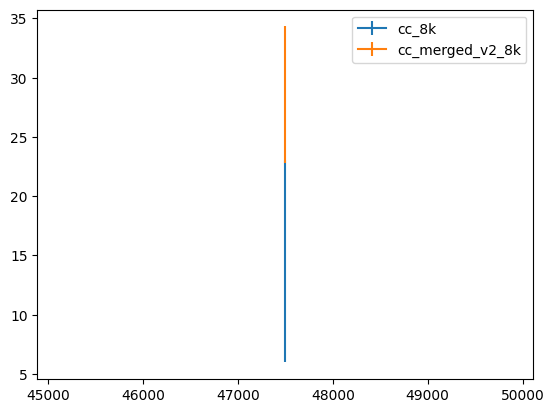

In [96]:
# plot the performance of 1b_8k on nq task
import matplotlib.pyplot as plt
INTERSTED_MODEL_NAME = 'tiny_LLaMA_360M_8k'
TASK_NAME = 'dbpedia'
df_1b_8k = df[df['model_name'] == INTERSTED_MODEL_NAME]
df_1b_8k = df_1b_8k[df_1b_8k['task'] == TASK_NAME]
# drop the columns that cannot be averaged
df_1b_8k = df_1b_8k.drop(columns=['model', 'task', 'model_name'])
# get the average over seeds, and standard deviation
df_1b_8k = df_1b_8k.groupby(['pretrain_dataset', 'step']).agg(['mean', 'std']).reset_index()
for dataset in df_1b_8k['pretrain_dataset'].unique():
    df_1b_8k_dataset = df_1b_8k[df_1b_8k['pretrain_dataset'] == dataset]
    plt.errorbar(df_1b_8k_dataset['step'], df_1b_8k_dataset['score']['mean'], yerr=df_1b_8k_dataset['score']['std'], label=dataset)
plt.legend()

In [97]:
df_1b_8k

pretrain_dataset   step n_shot       seed             score          
                            mean  std  mean      std     mean       std
0            cc_8k  47500   24.0  0.0  45.5  2.44949  14.5200  8.553364
1  cc_merged_v2_8k  47500   24.0  0.0  45.5  2.44949  28.5725  5.751625